![image](https://i.im.ge/2022/06/12/rHNFzJ.png)

## Email Analysis Report

In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')
#plt.style.use('seaborn-white')

In [2]:
df = pd.read_csv('mailchimp_email_events.csv', parse_dates=['Timestamp'])
df.head()

,Action,Type,List ID,Email ID,Timestamp,Campaign ID,List Is Active
0,open,NaN,6e3e8bfca7,a57a96c819cee01fab886ab859727fdf,2022-06-17 15:34:52+00:00,20c6a158b5,True
1,open,NaN,6e3e8bfca7,b947ffc31e5610817471637840bd8b50,2022-06-17 15:34:27+00:00,20c6a158b5,True
2,click,NaN,577e7bb830,ce1453a98b35b1f871a6c518323f6a69,2022-06-17 15:34:20+00:00,8f3d41ed77,True
3,open,NaN,577e7bb830,302b5aed88823e12e820bf9162256180,2022-06-17 15:33:46+00:00,f4f07b6d2d,True
4,open,NaN,577e7bb830,ce1453a98b35b1f871a6c518323f6a69,2022-06-17 15:33:39+00:00,8f3d41ed77,True


### Exploratory Data Analysis

In [3]:
df.dtypes

Action                         object
Type                           object
List ID                        object
Email ID                       object
Timestamp         datetime64[ns, UTC]
Campaign ID                    object
List Is Active                   bool
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112537 entries, 0 to 112536
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Action          112537 non-null  object             
 1   Type            183 non-null     object             
 2   List ID         112537 non-null  object             
 3   Email ID        112537 non-null  object             
 4   Timestamp       112537 non-null  datetime64[ns, UTC]
 5   Campaign ID     112537 non-null  object             
 6   List Is Active  112537 non-null  bool               
dtypes: bool(1), datetime64[ns, UTC](1), object(5)
memory usage: 5.3+ MB


In [5]:
df.shape

(112537, 7)

In [6]:
# check for missing values
df.isnull().sum()

Action                 0
Type              112354
List ID                0
Email ID               0
Timestamp              0
Campaign ID            0
List Is Active         0
dtype: int64

In [7]:
df['Type'].value_counts()

soft    134
hard     49
Name: Type, dtype: int64

In [8]:
df['Action'].value_counts()

open      105121
click       7233
bounce       183
Name: Action, dtype: int64

### Data Analysis

In [9]:
data = df[['Action', 'Timestamp']]

In [10]:
data.head()

,Action,Timestamp
0,open,2022-06-17 15:34:52+00:00
1,open,2022-06-17 15:34:27+00:00
2,click,2022-06-17 15:34:20+00:00
3,open,2022-06-17 15:33:46+00:00
4,open,2022-06-17 15:33:39+00:00


In [11]:
data.dtypes

Action                    object
Timestamp    datetime64[ns, UTC]
dtype: object

##### Extracting Day and Month name from Date Field

In [12]:
data["Week_day"]=data["Timestamp"].dt.day_name()
data["Month"]=data["Timestamp"].dt.month_name()

<ipython-input-12-e19e0c6eec9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Week_day"]=data["Timestamp"].dt.day_name()
<ipython-input-12-e19e0c6eec9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Month"]=data["Timestamp"].dt.month_name()


In [13]:
data.head()

,Action,Timestamp,Week_day,Month
0,open,2022-06-17 15:34:52+00:00,Friday,June
1,open,2022-06-17 15:34:27+00:00,Friday,June
2,click,2022-06-17 15:34:20+00:00,Friday,June
3,open,2022-06-17 15:33:46+00:00,Friday,June
4,open,2022-06-17 15:33:39+00:00,Friday,June


In [14]:
#Remove time and leave just date
data['Timestamp'] = pd.to_datetime(data['Timestamp']).dt.date

<ipython-input-14-5936dd29d09e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Timestamp'] = pd.to_datetime(data['Timestamp']).dt.date


In [15]:
data.head()

,Action,Timestamp,Week_day,Month
0,open,2022-06-17,Friday,June
1,open,2022-06-17,Friday,June
2,click,2022-06-17,Friday,June
3,open,2022-06-17,Friday,June
4,open,2022-06-17,Friday,June


In [16]:
newdata = data.groupby(['Timestamp', 'Week_day', 'Month', 'Action']).size().reset_index()

In [17]:
newdata.head()

,Timestamp,Week_day,Month,Action,0
0,2021-01-01,Friday,January,click,1
1,2021-01-01,Friday,January,open,32
2,2021-01-02,Saturday,January,click,7
3,2021-01-02,Saturday,January,open,128
4,2021-01-03,Sunday,January,click,9


In [18]:
newdata.rename(columns={0: 'count'}, inplace=True)

In [19]:
newdata.head()

,Timestamp,Week_day,Month,Action,count
0,2021-01-01,Friday,January,click,1
1,2021-01-01,Friday,January,open,32
2,2021-01-02,Saturday,January,click,7
3,2021-01-02,Saturday,January,open,128
4,2021-01-03,Sunday,January,click,9


##### Defining function for Bar Plot

In [20]:
def plot_barPlot(data,x,y,title,xlabel,ylabel):
    '''Plots bar plot'''
    plt.figure(figsize=(12,8))
    splot=sns.barplot(data=data,x=x,y=y,ci=0)

    for p in splot.patches:
        splot.annotate(round(p.get_height(),2),#text that you want to write on top
                       (p.get_x() + p.get_width() / 2., p.get_height()),# coordinates where text should be there
                       ha = 'center', va = 'center',# alignment of the text
                       xytext = (0, 10),# distance of text from top of the patch
                       textcoords = 'offset points') #do not change and remove it
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

### Clicks

In [21]:
click = newdata.loc[newdata['Action'] == 'click']

In [22]:
click.head(10)

,Timestamp,Week_day,Month,Action,count
0,2021-01-01,Friday,January,click,1
2,2021-01-02,Saturday,January,click,7
4,2021-01-03,Sunday,January,click,9
6,2021-01-04,Monday,January,click,23
9,2021-01-05,Tuesday,January,click,22
11,2021-01-06,Wednesday,January,click,18
13,2021-01-07,Thursday,January,click,21
15,2021-01-08,Friday,January,click,26
17,2021-01-09,Saturday,January,click,2
19,2021-01-10,Sunday,January,click,2


In [23]:
Week_day_total=(click.groupby(["Week_day"])[["count"]].sum().reset_index().sort_values('count'))
Week_day_total

,Week_day,count
2,Saturday,446
3,Sunday,666
4,Thursday,1091
6,Wednesday,1190
0,Friday,1259
5,Tuesday,1269
1,Monday,1312


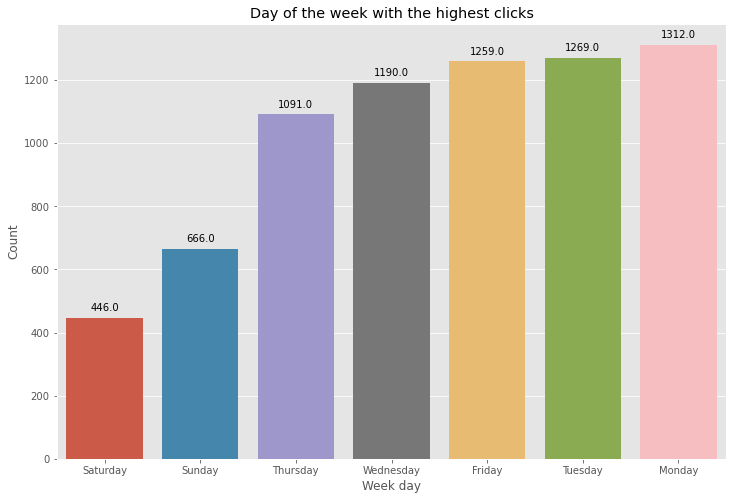

In [24]:
plot_barPlot(Week_day_total,"Week_day","count","Day of the week with the highest clicks","Week day","Count")

##### From the plot above we can see that Monday has the highest clicks

### Open

In [25]:
opens = newdata.loc[newdata['Action'] == 'open']

In [26]:
Week_day_total=(opens.groupby(["Week_day"])[["count"]].sum().reset_index().sort_values('count'))
Week_day_total

,Week_day,count
2,Saturday,6823
3,Sunday,11857
6,Wednesday,16731
4,Thursday,17051
5,Tuesday,17118
0,Friday,17122
1,Monday,18419


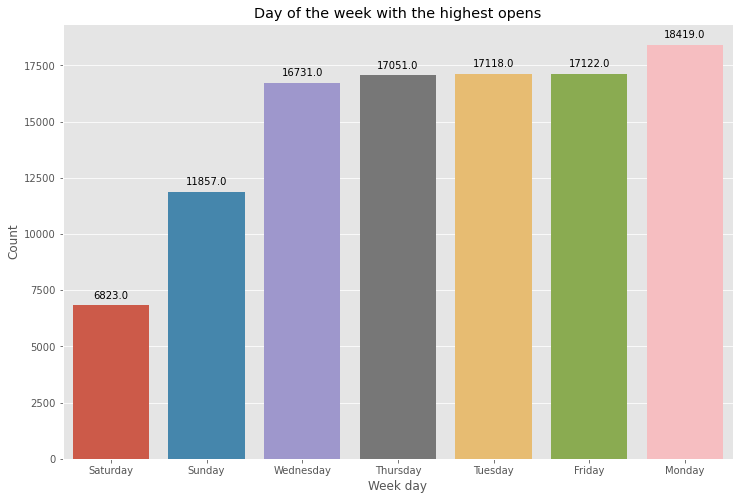

In [27]:
plot_barPlot(Week_day_total,"Week_day","count","Day of the week with the highest opens","Week day","Count")

#### Monday has the highest opens

### Bounce

In [28]:
bounce = newdata.loc[newdata['Action'] == 'bounce']

In [29]:
bounce.head()

,Timestamp,Week_day,Month,Action,count
8,2021-01-05,Tuesday,January,bounce,1
51,2021-01-26,Tuesday,January,bounce,4
56,2021-01-28,Thursday,January,bounce,1
59,2021-01-29,Friday,January,bounce,1
72,2021-02-04,Thursday,February,bounce,4


In [30]:
Week_day_total=(bounce.groupby(["Week_day"])[["count"]].sum().reset_index().sort_values('count'))
Week_day_total

,Week_day,count
2,Saturday,3
3,Sunday,7
0,Friday,18
6,Wednesday,21
5,Tuesday,43
1,Monday,45
4,Thursday,46


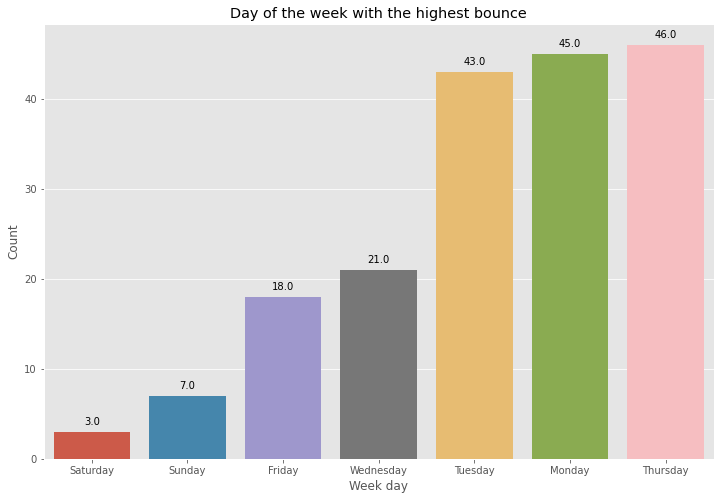

In [31]:
plot_barPlot(Week_day_total,"Week_day","count","Day of the week with the highest bounce","Week day","Count")

##### Thursday has the highest bounced emails

## Findings:
* Monday has the highest email clicks.
* Monday has the highest opens.
* Thursday has the highest occurence of bounced emails.

## Further Work:
* Consideration can be placed into breaking the analysis further by looking at the day of the week with the highest opens, clicks and bounce per month, as it is very likely that the trends for each month is different.
* We can further try to understand the emails bounce patterns and extract the possible causes.